In [2]:
import os
import pandas as pd
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# samlet

def initialize_MTCNN():
    mtcnn = MTCNN(keep_all = True)
    return mtcnn

def load_classifier():
    resnet = InceptionResnetV1(pretrained = 'casia-webface').eval()
    return resnet

def initialize_df():
    df = pd.DataFrame(columns = ("Newspaper", "Decade", "Number of faces", "Present face", "Pages with faces (%)"))
    return df

def get_decade(year):
    decade = str(year)[:3] + "0"
    return decade

def face_detection(image, mtcnn, df, newspaper, decade):
    boxes, _ = mtcnn.detect(image)
    if boxes is not None:
        n_faces = boxes.shape[0]
        for i in range(n_faces):
            df.loc[len(df)] = [newspaper, decade, n_faces, 1, 0]
    else:
        df.loc[len(df)] = [newspaper, decade, 0, 0, 0]
    return df 


def process_newspaper(filepath, mtcnn, df):
    for newspaper in os.listdir(filepath):
        newspaper_path = os.path.join(filepath, newspaper)
        for issue in os.listdir(newspaper_path):
            issue_year = int(issue.split('-')[1])
            decade = get_decade(issue_year)
            issue_dir = os.path.join(newspaper_path, issue)
            print(issue_dir)
            image = Image.open(issue_dir)
            df = face_detection(image, mtcnn, df, newspaper, decade)
    return df


def calculate_pages_with_faces(df):
    total_faces = df.groupby(["Newspaper", "Decade"]).sum(["Number of faces", "Present face"]).reset_index()
    total_pages = df.groupby(["Newspaper", "Decade"]).size().reset_index(name="Number of Pages")
    pages_with_faces = total_faces.merge(total_pages, on = ["Newspaper", "Decade"])
    pages_with_faces["Pages with Faces (%)"] = (pages_with_faces["Present face"] / pages_with_faces["Number of Pages"]) * 100
    return pages_with_faces

def plot(pages_with_faces, outpath):
    sns.relplot(data = pages_with_faces, kind = "line", x = "Decade", y = "Pages with faces (%)", hue = "Newspaper")
    plt.title('Percentage of pages with faces per pecade')
    plt.savefig(outpath)
    return print("The plot has been saved to the out folder")


def save_df_to_csv(df, csv_outpath):
    """
    Save the dataframe as .csv 
    """
    df.to_csv(csv_outpath)
    return print("The results have been saved to the out folder")


def main():
    filepath = os.path.join("../in_test")

    mtcnn = initialize_MTCNN()
    resnet = load_classifier()

    df = initialize_df()
    print(df)

    df = process_newspaper(filepath, mtcnn, df)
    print(df)

    pages_with_faces = calculate_pages_with_faces(df)
    save_df_to_csv(pages_with_faces, "../out/face_count.csv")
    print(pages_with_faces)

    plot(pages_with_faces, "../out/face_plot.png")

if __name__ == "__main__":
    main()

In [39]:
def calculate_pages_with_faces_1(df):
    total_faces =  df.groupby(["Newspaper", "Decade"]).sum(["Number of faces", "Present face"]).reset_index()
    total_pages = df.value_counts(["Newspaper","Decade"]).reset_index().rename(columns = {"count":"Number of pages"})    
    pages_with_faces = pd.merge(total_faces, total_pages, on = ["Newspaper", "Decade"])
    pages_with_faces["Pages with faces (%)"] = (pages_with_faces["Present face"] / pages_with_faces["Number of pages"]) * 100
    return pages_with_faces

def calculate_pages_with_faces_2(df):
    total_faces = df.groupby(["Newspaper", "Decade"]).sum(["Number of faces", "Present face"]).reset_index()
    total_pages = df.groupby(["Newspaper", "Decade"]).size().reset_index(name="Number of Pages")
    pages_with_faces = total_faces.merge(total_pages, on=["Newspaper", "Decade"])
    pages_with_faces["Pages with Faces (%)"] = (pages_with_faces["Present face"] / pages_with_faces["Number of Pages"]) * 100
    return pages_with_faces
    
def calculate_pages_with_faces_3(df):
    total_faces = df.groupby(["Newspaper", "Decade"]).sum(["Number of faces", "Present face"]).reset_index()
    total_pages = df.groupby(["Newspaper", "Decade"]).size().reset_index(name="Number of Pages")
    pages_with_faces = pd.merge(total_pages, pages_with_faces, on = ["Newspaper", "Decade"]) 
    pages_with_faces["Pages with faces (%)"] = (pages_with_faces["Present face"] / pages_with_faces["Number of pages"]) * 100
    return pages_with_faces

In [41]:
pages_with_faces

,Newspaper,Decade,Number of faces,Present face,Pages with faces (%),Number of Pages,Pages with Faces (%)
0,GDL,1790,0,0,0,1,0.0
1,GDL,1990,0,0,0,2,0.0
2,JDG,1820,0,0,0,1,0.0
3,JDG,1990,2,2,0,4,50.0


The plot has been saved to the out folder


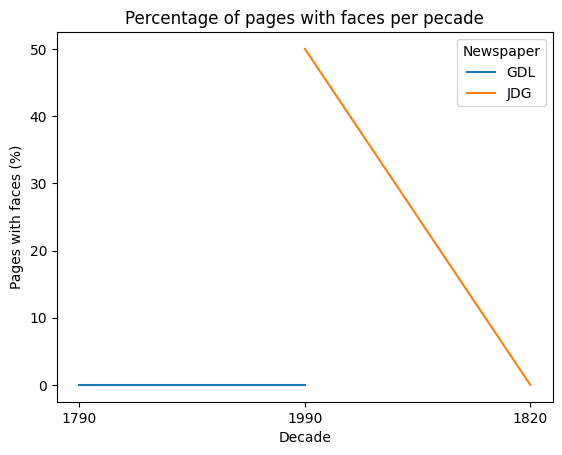

In [ ]:
def initialize_MTCNN():
    """
    Initialize Multi-Task Cascaded Convolutional Neural Networks (MTCNN) for face detection
    """
    mtcnn = MTCNN(keep_all = True)
    return mtcnn


def load_classifier():
    """
    Load pre-trained FaceNet model
    """
    resnet = InceptionResnetV1(pretrained = 'casia-webface').eval()
    return resnet


def initialize_df():
    """
    total number of faces per dacade
    percentage of pages for that decade which have faces on them
    """
    df = pd.DataFrame(columns = ("Newspaper", "Decade", "Number of faces", "Present face", "Pages with faces (%)"))
    
    newspaper = filepaths.split('-')[0]
    df.loc(len(df)) = [newspaper, 0, 0, 0, 0]
    return df


def get_decade(year):
    """
    Get the decade from a given year, ie. 1789 = 80
    """
    decade = str(year)[:3] + "0"
    return decade

In [ ]:
def face_detection(image, mtcnn, df):
    """
    The function detects faces in a given input image using MTCNN.
    """    
    boxes, _ = mtcnn.detect(image)

    i = 0
    if type(boxes) == type(None): 
        i += 1
    else:
        n_faces = boxes.shape[0]
        df.loc[i, "Number of faces"] = n_faces
        if n_faces > 0:
            df.loc[i, "Present face"] = 1
            i += 1

    return df 

In [ ]:

def process_newspaper(filepath, mtcnn, df):
    """ 
    The function iterates over the the three newspapers.
    """
    for newpaper in os.listdir(filepath):
        newspaper_path = os.path.join(filepath, newpaper)

        # Initialize data structures for the current newspaper
        newspaper_results = pd.DataFrame(columns = ("Decade", "Total Faces", "Total Pages"))

        # Iterate through each newspaper issue
        for issue in os.listdir(newspaper_path):
            issue_year = int(issue.split('-')[1])
            decade = get_decade(issue_year)
            
            print(issue) # JDG-1955-07-29-a-p0005.jpg

            issue_dir = os.path.join(newspaper_path, issue)
            print(issue_dir) # ../in/JDG/JDG-1955-07-29-a-p0005.jpg

            image = Image.open(issue_dir)
            df = face_detection(image, mtcnn, df)
            
            #text_row = [decade, total_faces, total_pages]
            #newspaper_results.loc[len(newspaper_results)] = text_row

    df.to_csv("../out/face_count.csv")
    #csv_outpath = os.path.join("out", f"{newspaper}_results.csv")

    return print("The results has been saved to the out folder")


In [ ]:
# group by decade

# Calculate
            total_faces = sum(n_faces)
            total_pages = len(n_faces)
            pages_with_faces = sum([1 for faces in n_faces if faces > 0])
            percentage_pages_with_faces = (pages_with_faces / total_pages) * 100
            
            print(total_faces)
            print(total_pages)

            text_row = [decade, total_faces, total_pages]
            newspaper_results.loc[len(newspaper_results)] = text_row

In [ ]:
issue = "GDL-1789-02-05-a-p0001.jpg"
issue_year = int(issue.split('-')[1])
issue_year

decade = get_decade(issue_year)
decade

'1780'

In [ ]:
# A plot which shows the latter information - i.e. percentage of pages with faces per decade over
#  all of the decades avaiable for that newspaper

def plot():
    """
    Plot the percentage of pages with faces per decade 
    """

    # x = decade
    # y = percentage of pages with faces 

    sns.relplot(data = df, kind = "line")
    (data = df, x = "Decade", y = "faces %", hue = "Newspaper")

    plt.title(f'Percentage of pages with faces per pecade - {newspaper}')
    plt.xlabel('Decade')
    plt.ylabel('Pages with faces (%)')

    plt.savefig("out", f'{newspaper}_faces_by_decade_plot.png')
    #plt.show()

    return print("The plot has been saved to the out folder")


In [ ]:
def main():

    filepath = os.path.join("../in_test")

    mtcnn = initialize_MTCNN()
    resnet = load_classifier()

    df = initialize_df(filepath)
    print(df)

    df = process_newspaper(filepath, mtcnn, df)
    print(df)
    
    plot()

if __name__ == "__main__":
    main()

In [ ]:
df

,Newspaper,Decade,Number of faces,Present face,Pages with faces (%)
0,NaN,NaN,2,1,NaN


In [ ]:
filepath = os.path.join("../in_test")

mtcnn = initialize_MTCNN()
resnet = load_classifier()

df = initialize_df()
print(df)

df = process_newspaper(filepath, mtcnn, df)
print(df)


Empty DataFrame
Columns: [Newspaper, Decade, Number of faces, Present face, Pages with faces (%)]
Index: []
GDL-1798-02-05-a-p0003.jpg
../in_test/GDL/GDL-1798-02-05-a-p0003.jpg
GDL-1997-08-09-a-p0029.jpg
../in_test/GDL/GDL-1997-08-09-a-p0029.jpg
GDL-1992-05-06-a-p0002.jpg
../in_test/GDL/GDL-1992-05-06-a-p0002.jpg
GDL-1997-08-09-a-p0027.jpg
../in_test/GDL/GDL-1997-08-09-a-p0027.jpg


OSError: Cannot save file into a non-existent directory: 'out'

In [ ]:
df = os.path.join("../in")
process_newspaper(df, mtcnn)

../in/JDG
JDG-1955-07-29-a-p0005.jpg
../in/JDG/JDG-1955-07-29-a-p0005.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1378x2000 at 0x7F66B127FC40>
None


ZeroDivisionError: division by zero

In [ ]:
mtcnn = MTCNN(keep_all = True)
image = Image.open("../in/GDL/GDL-1798-02-05-a-p0001.jpg")
type(image)

PIL.JpegImagePlugin.JpegImageFile